# ATP Tennis Data - Player Diff Stats + One Hot Encoding (All Categorical Data)


In our previous notebook, we saw that using raw player data gave us the best accuracy in Gradient Boosting. When we used diff data, we actually saw a performance decrease in our models.

The following columns were created:

* p1_ht_diff
* p1_rank_diff
* p1_seed_diff
* p1_age_diff

I'm hoping that by establishing relationships between features, this will provide our models with more information to better predict results


### Best results using raw player data

```
Model Score: 0.6833220796758946

ROC/AUC Score: 0.6833051847604916
              precision    recall  f1-score   support

        Loss       0.68      0.68      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810
```

# Summary of Results

Add diff data actually brought down accuracy for most of our model, except for Logistic Regression. 

```
Model Score: 0.6602970965563808

ROC/AUC Score: 0.6603173821876497
              precision    recall  f1-score   support

        Loss       0.66      0.67      0.66      7381
         Win       0.66      0.65      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810
```



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe"

# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features_test-{DESCRIPTION}.csv'
    DESCRIPTION = f"{DESCRIPTION}-test"
else:
    # update this
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-{DESCRIPTION}.csv'

START_YEAR = 1998
END_YEAR = 2018




In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

In [3]:
X_test.columns

Index(['draw_size', 'round_label', 'tourney_level_label', 'tourney_month',
       'tourney_year', 'age_diff', 'ht_diff', 'seed_diff', 'rank_diff',
       'p1_hand_l',
       ...
       'p2_200624', 'p2_200630', 'p2_202090', 'p2_202130', 'p2_202358',
       'p2_202359', 'p2_202385', 'p2_205734', 'best_of_3', 'best_of_5'],
      dtype='object', length=5253)

# Logistic Regression

In [4]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6629979743416611

ROC/AUC Score: 0.6629977169592232
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66      7381
         Win       0.66      0.66      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4893  2488
Win   2503  4926


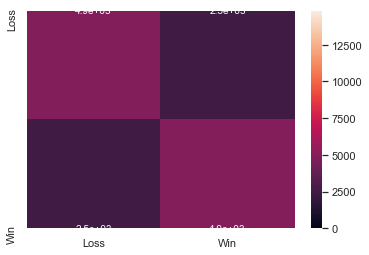

In [5]:
lr.analyze()

In [6]:
# ju.plot_2d(X_test, y_predict_lr)

In [7]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [8]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

TypeError: fit() takes 3 positional arguments but 4 were given

In [9]:
knn.analyze()

NameError: name 'knn' is not defined

In [10]:
# ju.plot_2d(X_test, y_predict_knn)

In [11]:
knn.save()

NameError: name 'knn' is not defined

# Decision Tree

In [12]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.5866981769074949

ROC/AUC Score: 0.5866975557200496
              precision    recall  f1-score   support

        Loss       0.59      0.59      0.59      7381
         Win       0.59      0.59      0.59      7429

    accuracy                           0.59     14810
   macro avg       0.59      0.59      0.59     14810
weighted avg       0.59      0.59      0.59     14810

      Loss   Win
Loss  4329  3052
Win   3069  4360


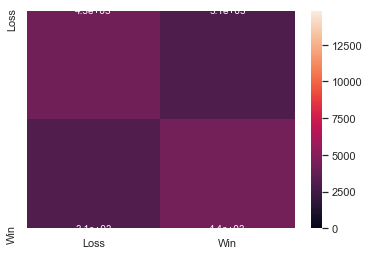

In [13]:
dt.analyze()

In [14]:
# ju.plot_2d(X_test, y_predict_dt)

In [15]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [16]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.6301147873058744

ROC/AUC Score: 0.630339813204163
              precision    recall  f1-score   support

        Loss       0.61      0.70      0.65      7381
         Win       0.65      0.56      0.60      7429

    accuracy                           0.63     14810
   macro avg       0.63      0.63      0.63     14810
weighted avg       0.63      0.63      0.63     14810

      Loss   Win
Loss  5165  2216
Win   3262  4167


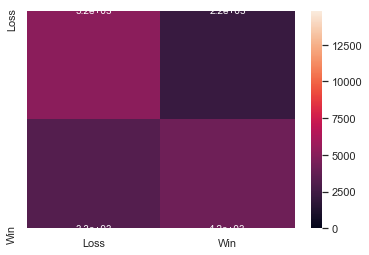

In [17]:
rf.analyze()

In [18]:
# ju.plot_2d(X_test, y_predict_rf)

In [19]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [20]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3644           10.31m
         2           1.3465           10.12m
         3           1.3319           10.05m
         4           1.3198            9.91m
         5           1.3099            9.75m
         6           1.3014            9.66m
         7           1.2944            9.57m
         8           1.2886            9.47m
         9           1.2835            9.38m
        10           1.2793            9.41m
        20           1.2578            8.39m
        30           1.2491            7.28m
        40           1.2432            6.18m
        50           1.2392            5.13m
        60           1.2356            4.09m
        70           1.2324            3.05m
        80           1.2298            2.03m
        90           1.2273            1.01m
       100           1.2251            0.00s


Model Score: 0.6602970965563808

ROC/AUC Score: 0.6603173821876497
              precision    recall  f1-score   support

        Loss       0.66      0.67      0.66      7381
         Win       0.66      0.65      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4920  2461
Win   2570  4859


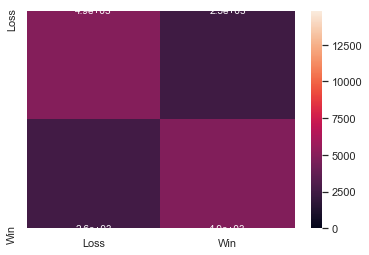

In [21]:
gb.analyze()

In [22]:
# ju.plot_2d(X_test, y_predict_gb)

In [23]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [24]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6592167454422687

ROC/AUC Score: 0.6592729102267486
              precision    recall  f1-score   support

        Loss       0.65      0.68      0.66      7381
         Win       0.67      0.64      0.65      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4994  2387
Win   2660  4769


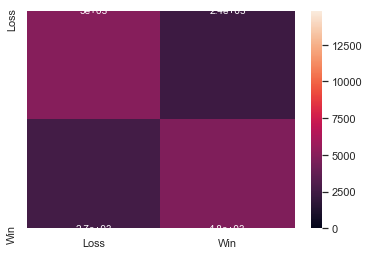

In [25]:
ab.analyze()

In [26]:
# ju.plot_2d(X_test, y_predict_ab)

In [27]:
ab.save()

Saving report: ../reports/summary.csv


# Results

* Decision Tree is still our best model
* no significant improvement for Adaboost
* We did see significant improvement for KNN when we used this dataset
* Gradient Boosting, Logistic Regression, Random Forest all did worse with this dataset

In [28]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)
report.tail(5)

,accuracy,classification_report,confusion_matrix,data_file,data_filter_file,description,end_year,fit_time_min,model_file,model_name,predict_time_min,roc_auc_score,start_year,total_time_min
174,0.586698,"{""Loss"": {""precision"": 0.5851581508515815, ""re...","{""0"": {""0"": 4329, ""1"": 3069}, ""1"": {""0"": 3052,...",../datasets/atp_matches_1985-2019_features-dif...,NaN,diff-ohe,2018,0.0,../models/decisiontreeclassifier-1998-2018-dif...,DecisionTreeClassifier,0.0,0.586698,1998,0.0
175,0.630115,"{""Loss"": {""precision"": 0.6129108816898066, ""re...","{""0"": {""0"": 5165, ""1"": 3262}, ""1"": {""0"": 2216,...",../datasets/atp_matches_1985-2019_features-dif...,NaN,diff-ohe,2018,0.0,../models/randomforestclassifier-1998-2018-dif...,RandomForestClassifier,0.0,0.630340,1998,0.0
176,0.661955,"{""Loss"": {""precision"": 0.6650481508456745, ""re...","{""0"": {""0"": 8218, ""1"": 4139}, ""1"": {""0"": 4304,...",../datasets/atp_matches_1985-2019_features-raw...,../models/gradientboostingclassifier-1985-2018...,ohe-stats-stats_diff5,2018,23.0,../models/gradientboostingclassifier-1985-2018...,GradientBoostingClassifier,0.0,0.661971,1985,23.0
177,0.660297,"{""Loss"": {""precision"": 0.6568758344459279, ""re...","{""0"": {""0"": 4920, ""1"": 2570}, ""1"": {""0"": 2461,...",../datasets/atp_matches_1985-2019_features-dif...,NaN,diff-ohe,2018,10.0,../models/gradientboostingclassifier-1998-2018...,GradientBoostingClassifier,0.0,0.660317,1998,10.0
178,0.659217,"{""Loss"": {""precision"": 0.6524692970995558, ""re...","{""0"": {""0"": 4994, ""1"": 2660}, ""1"": {""0"": 2387,...",../datasets/atp_matches_1985-2019_features-dif...,NaN,diff-ohe,2018,1.0,../models/adaboostclassifier-1998-2018-diff-oh...,AdaBoostClassifier,0.0,0.659273,1998,1.0


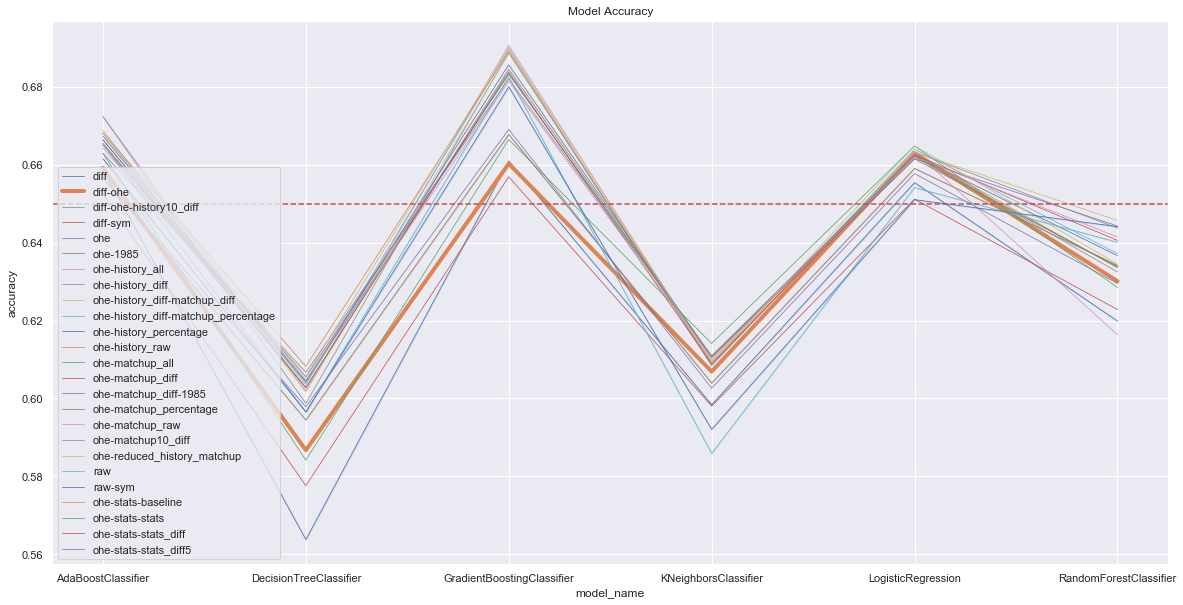

In [29]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

In [30]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-26 11:32


In [31]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')
current_report = report[(report.model_name == 'GradientBoostingClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)



Best Model: LogisticRegression


AssertionError: data must of length 1 - got 2